Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



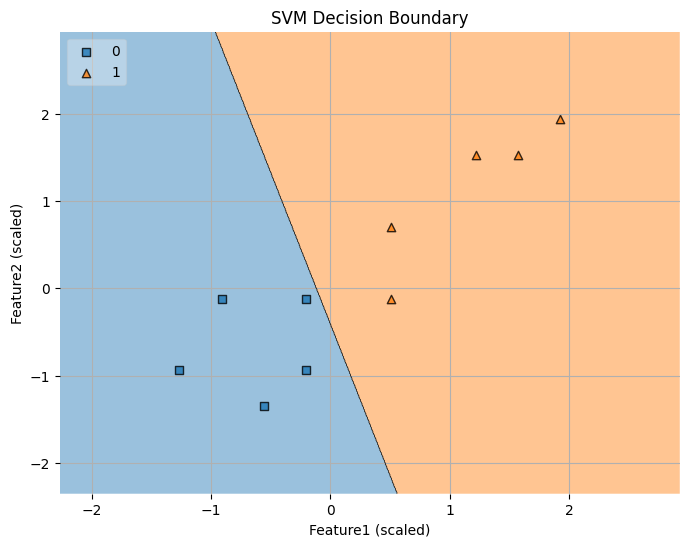

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

# Step 1: Create a sample classification dataset
data = {
    'Feature1': [2, 4, 4, 6, 6, 8, 1, 3, 9, 10],
    'Feature2': [4, 2, 4, 6, 4, 8, 2, 1, 8, 9],
    'Label': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
}
df = pd.DataFrame(data)

# Step 2: Save to CSV and Load
csv_file = "svm_sample_data.csv"
df.to_csv(csv_file, index=False)
df = pd.read_csv(csv_file)

# Step 3: Prepare data
X = df[['Feature1', 'Feature2']].values  # Fixed improper indexing syntax
y = df['Label'].values

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train SVM Classifier
svm_clf = SVC(kernel='linear')  # You can try 'rbf' or 'poly'
svm_clf.fit(X_train_scaled, y_train)

# Step 7: Predict and Evaluate
y_pred = svm_clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualize Decision Boundary (on full dataset)
X_scaled = scaler.transform(X)
plt.figure(figsize=(8, 6))
plot_decision_regions(X_scaled, y, clf=svm_clf, legend=2)
plt.title("SVM Decision Boundary")
plt.xlabel("Feature1 (scaled)")
plt.ylabel("Feature2 (scaled)")
plt.grid(True)
plt.show()
